In [3]:
# from geoband.API import *

import folium
from folium import plugins
import json
# import geopandas as gpd

import pandas as pd
import numpy as np

import json

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# # 데이터를 서버 주피터 노트북에 다운
# GetCompasData('SBJ_2012_001', '8', '8.오산시_유동인구(2019).csv')
# GetCompasData('SBJ_2012_001', '9', '9.오산시_어린이보호구역.csv')
# GetCompasData('SBJ_2012_001', '31', '31.오산시_법정경계(시군구).geojson')
# GetCompasData('SBJ_2012_001', '33', '33.오산시_법정경계(읍면동).geojson')

In [4]:
ppl=pd.read_csv("8.오산시_유동인구(2019).csv")
print(ppl.shape)
ppl.head()

(125163, 27)


,STD_YM,lon,lat,TMST_00,TMST_01,TMST_02,TMST_03,TMST_04,TMST_05,TMST_06,...,TMST_14,TMST_15,TMST_16,TMST_17,TMST_18,TMST_19,TMST_20,TMST_21,TMST_22,TMST_23
0,201901,126.995145,37.176703,0.08,0.05,0.04,0.04,0.08,0.27,0.80,...,0.69,0.76,0.95,0.91,0.70,0.43,0.34,0.22,0.14,0.10
1,201901,126.995142,37.177153,0.06,0.04,0.03,0.03,0.06,0.19,0.56,...,0.54,0.58,0.69,0.66,0.51,0.33,0.26,0.17,0.11,0.08
2,201901,126.995714,37.175804,0.00,0.00,0.00,0.00,0.00,0.01,0.03,...,0.04,0.04,0.05,0.05,0.03,0.02,0.02,0.01,0.01,0.00
3,201901,126.995711,37.176254,0.05,0.03,0.02,0.03,0.05,0.19,0.56,...,0.48,0.53,0.65,0.63,0.48,0.29,0.23,0.15,0.10,0.07
4,201901,126.995708,37.176705,0.02,0.01,0.01,0.01,0.02,0.07,0.18,...,0.19,0.20,0.23,0.22,0.17,0.11,0.09,0.06,0.04,0.03


In [5]:
ppl2=ppl.groupby(['lon','lat']).mean().reset_index().drop('STD_YM', axis=1)
ppl2=pd.melt(ppl2, id_vars=['lon','lat'])
ppl2=ppl2.groupby(['lon','lat']).mean().reset_index()

mms = MinMaxScaler()
ppl2['value'] = mms.fit_transform(np.array(ppl2['value']).reshape(-1,1))

ppl2

,lon,lat,value
0,126.995142,37.177153,0.004276
1,126.995145,37.176703,0.006964
2,126.995148,37.176252,0.001719
3,126.995151,37.175801,0.001137
4,126.995154,37.175351,0.001063
...,...,...,...
12397,127.097793,37.150955,0.000409
12398,127.097819,37.145997,0.003287
12399,127.098354,37.151407,0.002906
12400,127.098356,37.150956,0.025965


In [6]:
ppl2['value'].min()

0.0

In [7]:
ppl_location = []

for i in range(len(ppl2)):
    temp = []
    temp.append(ppl2.loc[i, 'lat'])
    temp.append(ppl2.loc[i, 'lon'])
    temp.append(ppl2.loc[i, 'value'])
    ppl_location.append(temp)

In [8]:
print('전체 리스트 개수:', len(ppl_location))
print('첫번째 리스트 안의 데이터 개수:', len(ppl_location[0]))

전체 리스트 개수: 12402
첫번째 리스트 안의 데이터 개수: 3


In [9]:
# ssg=gpd.read_file('31.오산시_법정경계(시군구).geojson')
# emd=gpd.read_file('33.오산시_법정경계(읍면동).geojson')

In [11]:
zone=pd.read_csv("data/9.오산시_어린이보호구역.csv")
print(zone.shape)
zone.head()

(91, 7)


,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도
0,특수학교,성심학교,N,0,25,127.017521,37.176762
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197
3,초등학교,대호초등학교,Y,3,12,127.057889,37.159106
4,초등학교,매홀초등학교,Y,2,6,127.063282,37.162749


In [12]:
zone_cmap={'어린이집':'orange', 
           '초등학교':'green', 
           '유치원':'blue', 
           '특수학교':'red'}
zone['marker_color']=zone['시설종류'].map(zone_cmap)

In [14]:
# 오산시 중심 맵 생성
center = [37.14887, 127.07728]
m = folium.Map(location=center, zoom_start=13)

hm = plugins.HeatMap(ppl_location, 
                     min_opacity=0.1,
                     max_val=1,
                     radius=10, blur=15,
                     max_zoom=5, color='red'
                    )

hm.add_to(m)

# folium.GeoJson(emd).add_to(m)


# 어린이보호구역 시각화
for i in range(len(zone)):
    folium.Marker(
    location = zone.loc[i, ['보호구역_위도', '보호구역_경도']],
    popup = zone.loc[i, '시설명'],
    radius = 15,
    icon=folium.Icon(color=zone.loc[i, 'marker_color'], icon='child', prefix='fa')
    ).add_to(m)

m

In [64]:
# m.save('어린이보호구역+평균유동인구.html')

In [15]:
# 시간대별 유동인구과 어린이보호구역에 대해 탐색해보자.
ppl3=ppl.groupby(['lon', 'lat']).mean()
ppl3=ppl3.drop('STD_YM', axis=1).reset_index()
ppl3=pd.melt(ppl3, id_vars=['lon', 'lat'], var_name='timestamp')
ppl3

,lon,lat,timestamp,value
0,126.995142,37.177153,TMST_00,0.061250
1,126.995145,37.176703,TMST_00,0.093333
2,126.995148,37.176252,TMST_00,0.017143
3,126.995151,37.175801,TMST_00,0.020000
4,126.995154,37.175351,TMST_00,0.020000
...,...,...,...,...
297643,127.097793,37.150955,TMST_23,0.033333
297644,127.097819,37.145997,TMST_23,0.270000
297645,127.098354,37.151407,TMST_23,0.206667
297646,127.098356,37.150956,TMST_23,1.870000


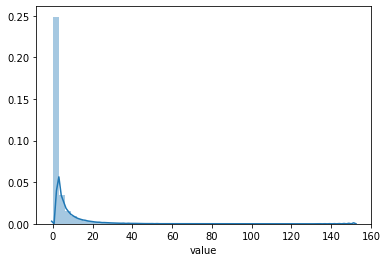

In [16]:
sns.distplot(ppl3['value'])

In [17]:
ppl3['value'].describe()

count    297648.000000
mean          3.064252
std           6.641320
min           0.000000
25%           0.107500
50%           0.640000
75%           2.923333
max         151.940000
Name: value, dtype: float64

In [18]:
ppl4=ppl3[ppl3['value']>0.64].reset_index(drop=True)
mms=MinMaxScaler()
ppl4['value_mms']=mms.fit_transform(np.array(ppl4['value']).reshape(-1,1))

ppl4

,lon,lat,timestamp,value,value_mms
0,126.996820,37.178963,TMST_00,3.210000,0.016986
1,126.997395,37.177163,TMST_00,0.695000,0.000364
2,126.997952,37.178067,TMST_00,0.663333,0.000154
3,126.998524,37.176717,TMST_00,0.712500,0.000479
4,126.999088,37.176719,TMST_00,0.709167,0.000457
...,...,...,...,...,...
148790,127.095526,37.153651,TMST_23,1.062857,0.002795
148791,127.095536,37.151848,TMST_23,1.904167,0.008355
148792,127.096087,37.154104,TMST_23,1.519167,0.005811
148793,127.097228,37.151403,TMST_23,3.308000,0.017634


In [19]:
time_list=ppl3['timestamp'].unique()
print(time_list)

['TMST_00' 'TMST_01' 'TMST_02' 'TMST_03' 'TMST_04' 'TMST_05' 'TMST_06'
 'TMST_07' 'TMST_08' 'TMST_09' 'TMST_10' 'TMST_11' 'TMST_12' 'TMST_13'
 'TMST_14' 'TMST_15' 'TMST_16' 'TMST_17' 'TMST_18' 'TMST_19' 'TMST_20'
 'TMST_21' 'TMST_22' 'TMST_23']


In [20]:
info=[]

for t in time_list:
    a=[]
    temp=ppl4[ppl4['timestamp']==t]
    
    for lat, lon, value in zip(temp['lat'], temp['lon'], temp['value_mms']):
        a.append([lat, lon, value])
    
    info.append(a)

In [21]:
print('전체 리스트 개수:', len(info))
print('첫번째 리스트 안의 데이터 개수:', len(info[0]))

전체 리스트 개수: 24
첫번째 리스트 안의 데이터 개수: 4460


In [22]:
info

[[[37.178963214102, 126.99681976568, 0.016986120290812947],
  [37.1771628425557, 126.99739495898301, 0.0003635161929940525],
  [37.178066611525395, 126.997952230816, 0.00015421899096717314],
  [37.176716924692705, 126.998524411359, 0.00047918043621943216],
  [37.1767193070556, 126.999087644814, 0.00045714915179554793],
  [37.176268616284794, 126.999090620375, 0.00018175809649702453],
  [37.1731374532369, 127.004743518016, 0.0012062128222075355],
  [37.172686761805295, 127.004746459599, 0.0017129323639568173],
  [37.1726891143766, 127.00530966367201, 0.006097157964309318],
  [37.173142155779296, 127.00586993291799, 0.0030953954615554075],
  [37.172691464271296, 127.005872867811, 0.007661379158404935],
  [37.172240772728706, 127.00587580263901, 0.004059264155100239],
  [37.1713393895399, 127.00588167209801, 0.0026107072042300065],
  [37.174045886024, 127.006427277174, 0.001029962546816479],
  [37.173144503035395, 127.006433140467, 0.007237276933245207],
  [37.172693811489296, 127.0064360

In [ ]:
# base map
m = folium.Map([37.14887, 127.07728], zoom_start=13)

# 시군구
# folium.GeoJson(ssg).add_to(m)

# 어린이보호구역
for i in range(len(zone)):
    folium.Circle(
    location = zone.loc[i, ['보호구역_위도', '보호구역_경도']],
    radius=30
    ).add_to(m)

# heatmap with time
hm = plugins.HeatMapWithTime(info, index=[str(i) for i in range(0,24)], auto_play=True)
hm.add_to(m)


m.save('어린이보호구역+유동인구-시간대별.html')